<a href="https://colab.research.google.com/github/Leonel-Ariel-Ruppel/READ-ME/blob/main/Maestr%C3%ADa_teor%C3%ADa_08_Algoritmos_Geneticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/dieguito1331/cienciaDatos/blob/master/maestria/teoria/08 - Algoritmos Geneticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmos Genéticos**

Un algoritmo genético es una búsqueda heurística que está inspirada en la teoría natural de la evolución de Darwin. Este algoritmo refleja el proceso de selección natural, donde los individuos más aptos son seleccionados para reproducirse en orden, para producir descendencia de la siguiente generación.

Esta noción de selección natural puede ser aplicado para resolver problemas. Consideramos que un grupo de soluciones para un problema y seleccionamos al mejor grupo de soluciones de todos ellos.

Se supone que los individuos (posibles soluciones del problema), pueden representarse como un conjunto de parámetros (que denominaremos genes), los cuales agrupados forman un conjunto de valores, a menudo conocidios como cromosoma. Debe existir una representación de estos genes para poder utilizarlos posteriormente en el algoritmo genético y dotarles de unos valores. Se pueden considerar tres tipos básicos de representación o codificación de los genes:

* Binaria: en ella se utiliza un vector cuya longitud es la del número de genes de cada individuo y el valor que puede tomar cada elemento es un número binario  
![imagen](https://www.adictosaltrabajo.com/wp-content/uploads/tutorial-data/jgap/cromobinario.jpg)

* Entera: en ella se utiliza un vector cuya longitud es la del número de genes de cada individuo y el valor que puede tomar cada elemento es un número entero.
![imagen](https://www.adictosaltrabajo.com/wp-content/uploads/tutorial-data/jgap/cromoentero.jpg)

* Real: en ella se utiliza un vector cuya longitud es la del número de genes de cada individuo y el valor que puede tomar cada elemento es un número real.
![Imagen](https://www.adictosaltrabajo.com/wp-content/uploads/tutorial-data/jgap/cromoreal.jpg)  

Un individuo es una solución potencial al problema que se trata. Cada individuo contiene un cromosoma. A un conjunto de individuos se le denomina población. El fitness de un individuo es la evaluación de la función de evaluación e indica qué tan bueno es el individuo (es decir, la solución al problema) con respecto a los demás.


1. Comenzar con una población inicial, la cual puede ser generada de manera aleatoria.
2. Calcular el fitness (aptitud) de cada individuo.
3. Aplicar el operador de selección con base en el fitness de la población.
4. Aplicar los operadores genéticos de reproducción, cruce y mutación a la población actual para generar a la población de la siguiente generación.
5. Ir al paso 2 hasta que la condición de parada se satisfaga.
6. Cuando se cumple la condición de parada, se devuelve al mejor individuo encontrado (bien el mejor de todas las generaciones, bien el mejor de la última generación).
Al igual que en muchas otras heurísticas, el comportamiento del algoritmo genético es altamente dependiente de los parámetros iniciales (tamaño de la población, porcentaje de cruce, porcentaje de mutación, número de generaciones, etc.), por lo que será necesario ajustar esos parámetros para tratar de mejorar la solución para los objetivos del problema.

A cada iteración de este proceso se le denomina una generación. Un algoritmo genético típicamente se itera de 50 a 500 o incluso más generaciones. El conjunto entero de generaciones se denomina una ejecución. Al final de una ejecución existen a menudo uno o varios cromosomas altamente adecuados en la población, y que pueden ser elegidos como solución al problema.

![imagen](https://tcl.azureedge.net/p/images_ar/art_img/ef82d0f0-5046-4386-b502-feb67e55f111.jpg)  







In [ ]:
#importo las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
import math

## Ejemplo en Python

Vamos a maximizar una función no Lineal


Debemos encontrar el valor de $x$  que maximice el valor de $y$ en la función
$$f(x) = -[0,1 + (1-x)^2 - 0,1 cos(6\pi (1-x))]+2$$

In [ ]:
def fx(x):
    return -(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)) )+2

### Graficamos la función

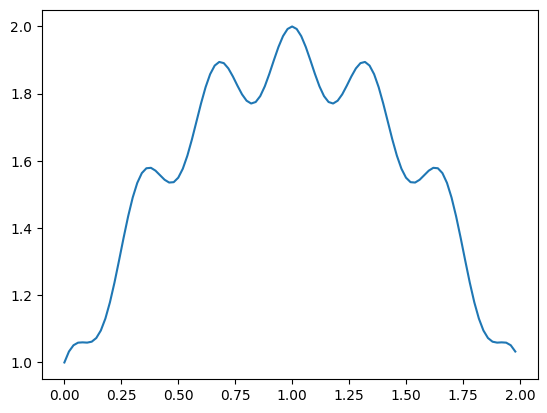

In [ ]:
y_axis = []
x_axis=np.arange(0,2,0.02)

for num in x_axis:
    y_axis.append(fx(num))
plt.plot(x_axis,y_axis)


La función que debemos maximizar tiene máximos y mínimos locales. Con el algoritmos genético buscaremos llegar al punto más alto de la función que se dará en el x = 1


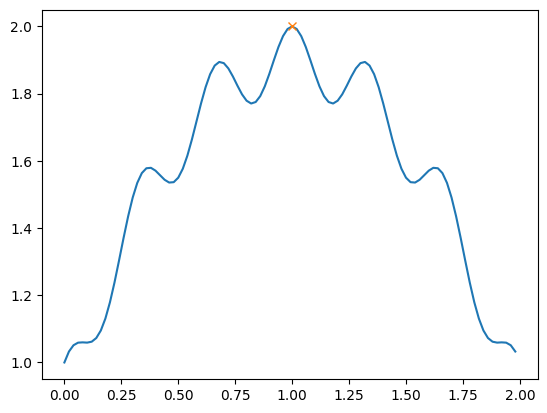

In [ ]:
plt.plot(x_axis,y_axis)
plt.plot(1,fx(1),'x')

Ejemplo con x = 0.54

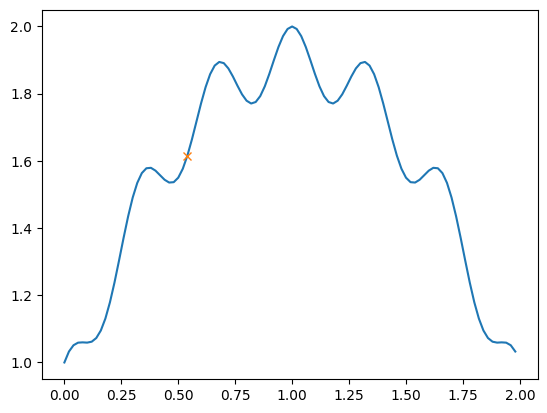

In [ ]:
x = 0.54
#x = individuo_num
y = fx(x)
plt.plot(x_axis,y_axis)
plt.plot(x,y,'x')

### Creamos la función para transformar a númerico
Los individuos de la población deben estar representados por valores que van desde el 0 hasta el 2.

Los individuos serán representados por valores de una lista. Por ejemplo el ejemplo 0.54, será representado como una lista igual a [0,5,4].  
Necesitamos representar los genes como una lista para poder realizar la mutación y el entrecruzamiento. Así que debemos manejar una función que convierta una lista en números decimales.

In [ ]:
#ejemplo x = 0.54
x = [0,5,4]

Creamos una función que para cada lista se pueda reconvertir en un valor decimal

In [ ]:
def listToDecimal(num):
    decimal=0
    for i in range(len(num)):
        decimal+=num[i]*10**(-i) #0*(10^(0))+5*(10^(-1))+4*(10^(-2))
    return decimal

x_num = listToDecimal(x)
x_num

0.54

### Creamos los individuos con sus genes
La variable **ind_size** nos dirá el tamaño que tendrá cada uno de los individuos, siempre teniendo en cuenta que el primer valor de la lista será el número entero y el resto de los valores serán las posiciones de los decimales, en este caso cada individuo tendrá 14 decimales.  
La variable **genetic_pool** esta compuesta por dos partes, la primera lista contrendrá los valores [0,1] que serán los posibles valores enteros (no se incluye el 2 ya que si algún indiviuo obtiene dicho valor pasará con los decimales el dominio de la función que definimos) y una segunda lista de valores [0,1,2,3,4,5,6,7,8,9], que serán todos los valore posibles a obtener

In [ ]:
ind_size = 15
#Genetic pool
genetic_pool=[[0,1],[0,1,2,3,4,5,6,7,8,9]]

individuo = []
individuo += [np.random.choice(genetic_pool[0])]
individuo += list(np.random.choice(genetic_pool[1],ind_size-1))

individuo

[0, 6, 5, 9, 6, 8, 1, 2, 7, 4, 1, 8, 9, 6, 8]

In [ ]:
individuo_num = listToDecimal(individuo)
individuo_num

0.6596812741896803

### Creamos la población
Creamos una población de 100 indiviuos de forma aleatoria con la construcción de sus genes de forma aleatoria (recordemos que cada individuo tendrá 15 genes)

In [ ]:
def poblacionFunc(cant_individuos, ind_size, genetic_pool):
  poblacion = []
  for i in range(100):
      individuo = []
      individuo += [np.random.choice(genetic_pool[0])]
      individuo += list(np.random.choice(genetic_pool[1],ind_size-1))
      poblacion.append(individuo)
  return poblacion

poblacion = poblacionFunc(100, ind_size, genetic_pool)
poblacion[:10]

[[1, 7, 6, 4, 5, 5, 5, 1, 2, 7, 3, 6, 1, 0, 8],
 [1, 9, 1, 1, 0, 7, 8, 5, 4, 1, 6, 3, 0, 1, 7],
 [0, 1, 4, 0, 4, 2, 7, 5, 2, 6, 6, 5, 2, 9, 1],
 [0, 8, 8, 2, 8, 4, 8, 2, 9, 8, 7, 0, 7, 8, 3],
 [0, 6, 8, 2, 7, 5, 2, 4, 9, 6, 2, 3, 2, 5, 0],
 [0, 1, 8, 6, 3, 3, 9, 8, 9, 4, 9, 0, 1, 8, 6],
 [0, 7, 1, 3, 6, 3, 8, 4, 3, 0, 5, 5, 2, 9, 9],
 [1, 4, 7, 0, 7, 1, 2, 2, 0, 6, 0, 0, 4, 3, 8],
 [0, 2, 3, 4, 4, 5, 3, 3, 5, 6, 9, 1, 0, 4, 4],
 [0, 4, 8, 0, 8, 4, 8, 6, 4, 0, 4, 7, 2, 8, 0]]

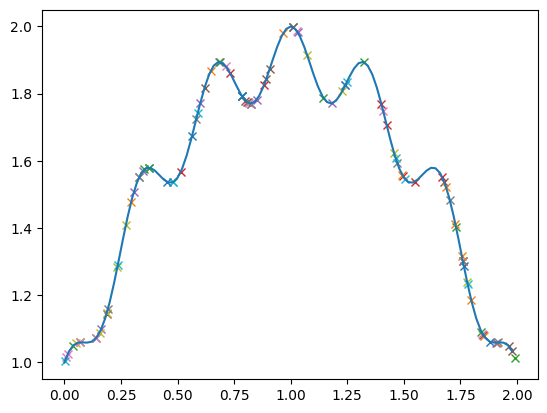

In [ ]:
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

### Creamos la función de fitness
Los individuos más fuertes (o mejores) serán aquellos que obtengan un valor más alto en la función (ya que estamos buscando un máximo de la función). Para luego obtener valores relativos que estén entre 0 y 1, se divide cada salida de la función $f_x(x)$ con la suma total de las salidas. Los valores más altos generarán una proporción más alta.

In [ ]:
def fitnessFunc (poblacion):
  fitness =[]

  #extraigo los valores de y para medir su éxito
  for individuo in poblacion:
      x = listToDecimal(individuo)
      y = fx(x)
      fitness += [y]

  #convierto fitnees en un vector para realizar operaciones
  #más fácilmente
  fitness = np.array(fitness)

  #divido todos los valores de y para la suma total
  #y así obtener valores entre 0 y 1
  fitness=fitness/fitness.sum()
  return fitness

fitness = fitnessFunc(poblacion)

In [ ]:
round(fitness.sum(), 1)

1.0

### Entrecruzamiento
Consiste en mezclar los genes de los mejores individuos. En este caso vamos a elegir dos elementos al azar, de acuerdo a la probabilidad que nos dio la función de fitness para que puedan producir un nuevo individuo. Lo importante es no descartar de lleno a los peores individuos, porque quizá su código genético puede servir para lograr algún individuo mejor. Luego se busca un punto en donde se corte y permite combinar los genes de los padres, esta variable se denomina **cross_point**. Se va a copiar los genes del primer padre hasta este punto, y luego los genes del otro padre.

In [ ]:
def entrecruzamientoFunc(poblacion, fitness):
  size_poblacion = len(poblacion)
  #hijos
  offspring = []
  for i in range(size_poblacion//2):
      parents = np.random.choice(size_poblacion, 2, p=fitness)#elijo 2 padres, el parametro p indica las probabilidades de cada uno de los elementos
      cross_point = np.random.randint(ind_size)
      offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
      offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]
  return offspring

poblacion = entrecruzamientoFunc(poblacion, fitness)

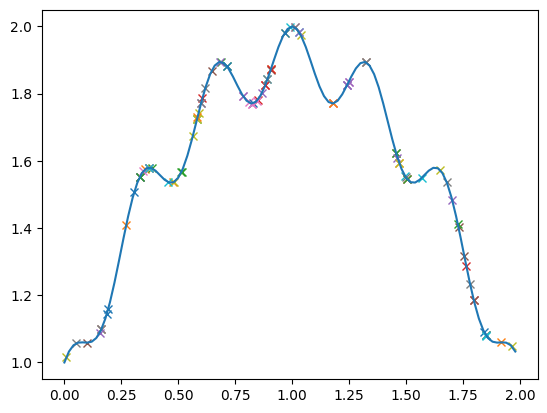

In [ ]:
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

### Mutaciones
Otro aspecto interesante del algoritmo genético es la probabilidad de que se produzca una mutación en los individuos. Lo que significa que el ADN de cualquier individuo puede producir un gen que no viene de sus padres.
El individuo [0,5,3,8,9] puede mutar a [0,5,4,8,9] y esto mantiene la puerta abierta hacia el mejoramiento de la población.

In [ ]:
def mutateFunc(individuals, prob, pool):
    for i in range(len(individuals)):
        mutate_individual=individuals[i]
        if np.random.random() < prob:
            mutation = np.random.choice(pool[0])
            mutate_individual = [mutation] + mutate_individual[1:]

        for j in range(1,len(mutate_individual)):
            if np.random.random() < prob:
                mutation = np.random.choice(pool[1])
                mutate_individual = mutate_individual[0:j] + [mutation] + mutate_individual[j+1:]
        individuals[i] = mutate_individual


In [ ]:
mutateFunc(poblacion,0.005,genetic_pool)
poblacion[:10]

[[1, 8, 4, 2, 2, 4, 1, 2, 8, 1, 8, 0, 3, 0, 0],
 [0, 4, 7, 8, 9, 1, 4, 5, 0, 4, 9, 7, 3, 2, 0],
 [0, 6, 8, 5, 5, 6, 0, 0, 9, 7, 0, 3, 8, 5, 6],
 [1, 1, 8, 0, 6, 3, 4, 2, 3, 5, 6, 7, 2, 6, 5],
 [0, 6, 8, 2, 7, 5, 2, 4, 9, 6, 4, 3, 5, 0, 9],
 [1, 7, 3, 0, 6, 8, 0, 1, 1, 6, 2, 3, 2, 5, 0],
 [1, 2, 4, 8, 9, 2, 9, 6, 3, 6, 4, 3, 2, 3, 9],
 [1, 6, 7, 8, 1, 2, 8, 5, 1, 9, 0, 7, 0, 5, 2],
 [0, 0, 0, 9, 1, 9, 7, 0, 4, 4, 5, 4, 1, 1, 2],
 [1, 0, 3, 0, 5, 6, 2, 5, 8, 3, 4, 4, 7, 5, 1]]

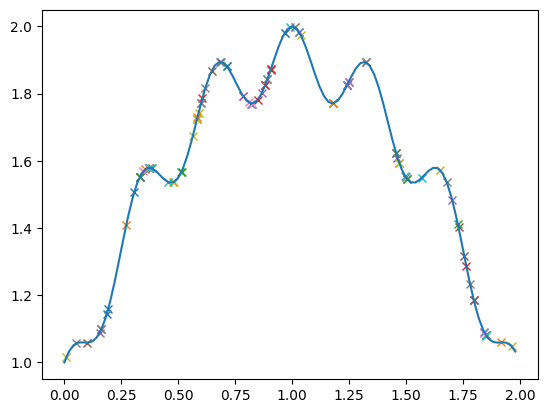

In [ ]:
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

La mutación es baja ya que la probabilidad de mutación está definida como baja (0.005)

In [ ]:
poblacion = poblacionFunc(individuo, ind_size, genetic_pool)


### Algoritmo completo

X obtenido es 1.0123241922644295 y se obtiene una y = 1.9971619336657822


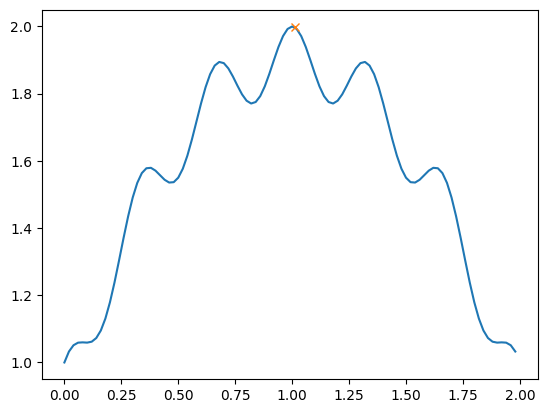

In [ ]:
ind_size = 15
genetic_pool=[[0,1],[0,1,2,3,4,5,6,7,8,9]]
individuos = 100
generaciones = 1000

poblacion = poblacionFunc(individuos, ind_size, genetic_pool)
for _ in range(generaciones):
  fitness = fitnessFunc(poblacion)
  poblacion = entrecruzamientoFunc(poblacion, fitness)
  mutateFunc(poblacion,0.005,genetic_pool)

indice = np.where(fitness == fitness.max())[0][0] #buscar el indice del mejor fitness
x = listToDecimal(poblacion[indice])
y_max = fx(x)
print("X obtenido es {} y se obtiene una y = {}".format(x, y_max))

plt.plot(x_axis,y_axis)
plt.plot(x,y_max,'x')

## Resolución del problema para minimizar el tiempo del viajero

1) Se deben definir 20 puntos al azar  
2) Crear un grafo para representar los puntos  
3) Definir la función a minimizar (Euclidea)  
4) Definir la población inicial. Cada individuo tendrá una combinación de los 20 puntos diferente. La población tendrá 100 individuos. Cada gen es un punto de los 20 creados.  
5) Definir la función fitness usando la distancia euclidea definida en el punto 3  
6) Crear una función de mutación en donde se cambien dos genes. Manejar un ratio de mutación que a priori estará seteado en 0.001  
7) Crear una función de Cross over.  
8) Productivizar con 1000 generaciones, quedándonos con el mejor elemento

In [ ]:
import numpy as np
from scipy.spatial import distance
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
#Punto 1
n_points = 20
pos = { i:(np.random.random(),np.random.random()) for i in range(n_points)}


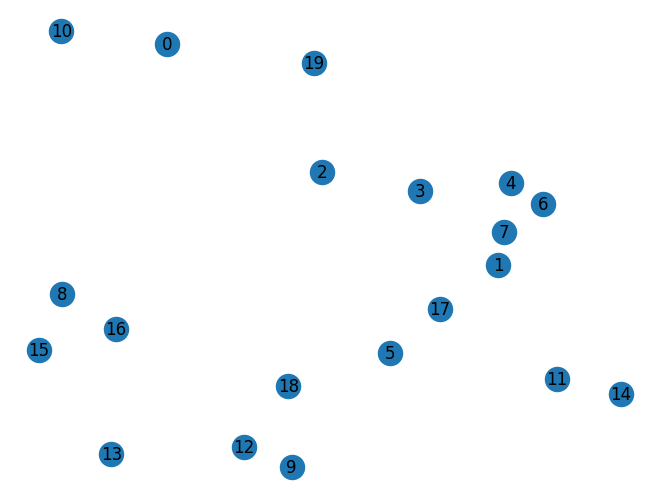

In [ ]:
#Punto 2
G = nx.Graph()
for i in range(n_points):
  G.add_node(i)
nx.draw(G,pos, with_labels=True)

In [ ]:
pos

{0: (0.9231031631255965, 0.27395011280535486),
 1: (0.3563695756995694, 0.7901321882408665),
 2: (0.4376746938152605, 0.4380362703705619),
 3: (0.6876574171474822, 0.46352060690661145),
 4: (0.5095928398674409, 0.4140315909487916),
 5: (0.8033446196798282, 0.4563476852423264),
 6: (0.8235591331313153, 0.7986284981598242),
 7: (0.3877804136429802, 0.3170761381312782),
 8: (0.8400460998758819, 0.13049512345119363),
 9: (0.8025531823426895, 0.7262164193588844),
 10: (0.9072387523153737, 0.23721732549330754),
 11: (0.9712538867614354, 0.9626566901906473),
 12: (0.7690212323704545, 0.3191857174740952),
 13: (0.8745659402307683, 0.7269191617299581),
 14: (0.5536723832661105, 0.9338961553932205),
 15: (0.09409380410502388, 0.45631538792003823),
 16: (0.9446057873434199, 0.9046586711119989),
 17: (0.9075193779531737, 0.2357074939224164),
 18: (0.19944635387684795, 0.14399574147291627),
 19: (0.4338906307736232, 0.8508988761189787)}

In [ ]:
individuo

[0, 3, 7, 4, 1, 1, 2, 2, 0, 6, 0, 0, 4, 3, 8]

In [ ]:
#Punto 3
#La distancia entre puntos se usará la euclidea. Se buscará minimizar el espacio recorrido
distance.euclidean(pos[0],pos[1])

def getTotalDistanceFunc(individuo, pos):
  individuo = list(individuo)
  ring_path = individuo.copy()
  ring_path.append(individuo[0])
  total_distance = 0
  for i in range(n_points):
    pos1 = pos[ring_path[i]]
    pos2 = pos[ring_path[i+1]]
    total_distance += distance.euclidean(pos1,pos2)
  return total_distance


individuo = np.random.choice(list(pos.keys()),20,False) #False indice que no hay reemplazo, cada elemento se usa una sola vez.
distancia = getTotalDistanceFunc(individuo, pos)
distancia

12.48735099265063

In [ ]:
pos.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [ ]:
distance.euclidean(pos[0],pos[17])


0.755258448498616

In [ ]:
#Punto 4
def populationFunc(n_population, pos):
  possible_gen = list(pos.keys())
  population = [np.random.choice(possible_gen,n_points,False) for i in range(n_population) ]
  return population

initial_population = populationFunc(1000, pos)

In [ ]:
#Punto 5
def fitnessFunc(population, pos):
  fitness = [getTotalDistanceFunc(parent,pos) for parent in population]
  min_distance = min(fitness)
  mean_distance = np.mean(fitness)
  fitness = np.array(fitness)

  fitness = fitness.max() - fitness + 1 # to avoid 0
  fitness = fitness/fitness.sum() # las proporciones más altas son las distancias más cortas
  return fitness, min_distance, mean_distance



fitness, min_distance, mean_distance = fitnessFunc(initial_population, pos)

In [ ]:
#Punto 6
def mutationFunc(individual, n_points, mutation_rate=0.001):
  for i in range(n_points):
    if(np.random.random()<mutation_rate):
      mutation = np.random.randint(n_points)
      # change order of two genes
      temp = individual[mutation]
      individual[mutation] = individual[i]
      individual[i] = temp
  return individual

In [ ]:
individual = mutationFunc(initial_population[0], n_points)
individual

array([ 0,  2,  7, 12, 15,  5,  3, 19,  4, 13,  9, 16,  6, 14, 18, 10, 11,
       17,  8,  1])

In [ ]:
#Punto 7
def combineGenesFunc(parent1,parent2, n_points):
  parent1 = list(parent1)
  parent2 = list(parent2)
  individual = parent1.copy()
  for i in range(n_points):
    if(np.random.random() < 0.5): #flip a coin
      idx = individual.index(parent2[i])
      individual[idx] = individual[i]
      individual[i] = parent2[i]
  return individual

In [ ]:
individual = combineGenesFunc(initial_population[0], initial_population[1], n_points)
individual

[0, 2, 1, 17, 9, 19, 18, 5, 12, 13, 15, 16, 6, 14, 3, 10, 11, 4, 8, 7]

0 7.805626373325026


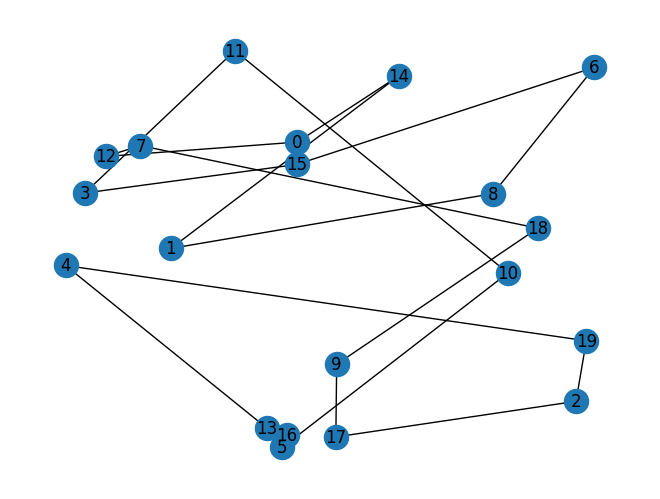

100 5.777268598844276


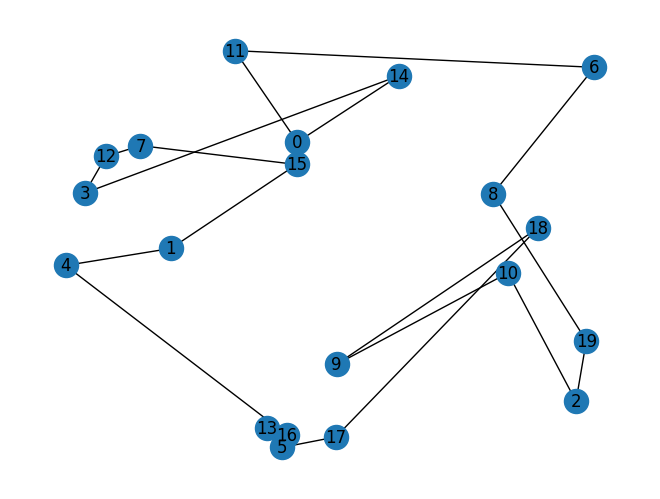

200 5.777268598844276
300 5.777268598844276
400 5.777268598844276
500 5.777268598844276
600 5.777268598844276
700 5.777268598844276
800 5.753974787664785


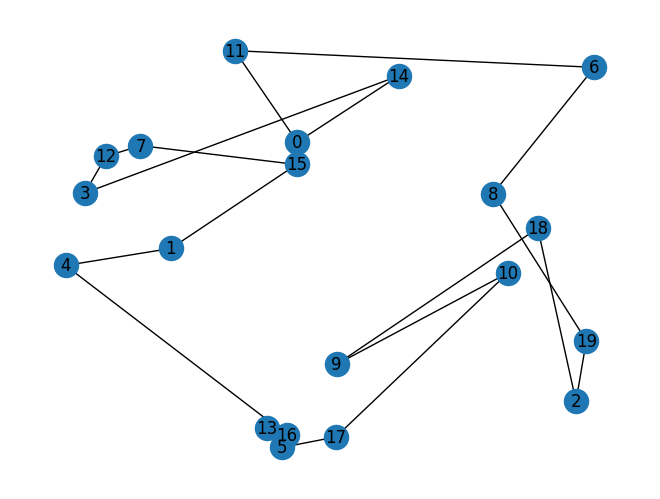

900 5.753974787664785


In [ ]:
n_population = 1000
epochs = 1000. #epoch es un ciclo completo de entrenamiento.  En este caso se asimila a una generacion.
n_points = 20
min_path_distance = []
min_distance = []
mean_distance = []

pos = { i:(np.random.random(),np.random.random()) for i in range(n_points)}

current_population = populationFunc(n_population, pos)
fitness, min_distance_value, mean_distance_value = fitnessFunc(initial_population, pos)

for t in range(epochs):
  ########################
  #Creo una nueva población
  new_generation = []
  for _ in range(n_population-1):
    #select two parents
    parents = np.random.choice(n_population,p=fitness,size=2,replace=False)
    parent1 = current_population[parents[0]]
    parent2 = current_population[parents[1]]
    new_individual = combineGenesFunc(parent1,parent2, n_points)
    new_individual = mutationFunc(new_individual, n_points)
    new_generation.append(new_individual)
  ########################

  #
  idx = np.where(fitness == fitness.max())[0][0]
  # el mejor individuo de la generación anterior prevalece
  new_generation.append(current_population[idx])
  current_population = new_generation
  # nuevo fitness
  fitness, min_distance_value, mean_distance_value  = fitnessFunc(current_population, pos)
  min_distance.append(min_distance_value)
  mean_distance.append(mean_distance_value)

  # get best path each 100 epochs
  if(t % 100 == 0):
    min_idx = np.where(fitness == fitness.max())[0][0]
    d = getTotalDistanceFunc(current_population[min_idx],pos)
    print(t,d)
    if(d not in min_path_distance):
      min_path_distance.append(d)

      draw_edges = current_population[min_idx].copy()
      draw_edges = list(draw_edges)
      draw_edges.append(draw_edges[0])

      G = nx.Graph()
      for i in range(n_points):
        G.add_node(i)

      for i in range(len(draw_edges)-1):
        G.add_edge(draw_edges[i],draw_edges[i+1])

      nx.draw(G,pos, with_labels=True)
      plt.show()
